**PROJECT NAME :** Emotion Detection from Text

**PROJECT PREPARED BY :** P. V. N. S. Hasini

**PROBLEM STATEMENT :** Develop a model capable of detecting and classifying emotions expressed in text into categories such as sadness, joy, love, etc. The goal is to accurately analyze the context of user-generated texts using deep learning techniques, enabling applications like improved sentiment understanding in chatbots, social media monitoring, and user engagement analysis.

**Dataset Source from KAGGLE** : https://www.kaggle.com/datasets/parulpandey/emotion-dataset

**Install the required libraries**

In [ ]:
!pip install tensorflow scikit-learn pandas

**Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

**Upload dataset files**

In [ ]:
print("Please upload training.csv, validation.csv, and test.csv files")
uploaded = files.upload()

Please upload training.csv, validation.csv, and test.csv files


Saving test.csv to test.csv
Saving training.csv to training.csv
Saving validation.csv to validation.csv


**Load the CSV files into dataframes**

In [ ]:
train_df = pd.read_csv('training.csv')
val_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

**Display sample data**

In [ ]:
print("Training data sample:")
print(train_df.head())
print("Validation data sample:")
print(val_df.head())
print("Test data sample:")
print(test_df.head())

Training data sample:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
Validation data sample:
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1
Test data sample:
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me

In [ ]:
TEXT_COLUMN = 'text'
LABEL_COLUMN = 'label'

**Preprocessing**

In [ ]:
all_texts = pd.concat([train_df[TEXT_COLUMN], val_df[TEXT_COLUMN], test_df[TEXT_COLUMN]])

In [ ]:
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, lower=True, oov_token="<OOV>")
tokenizer.fit_on_texts(all_texts)

In [ ]:
def encode_texts(df):
    sequences = tokenizer.texts_to_sequences(df[TEXT_COLUMN])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded

In [ ]:
X_train = encode_texts(train_df)
X_val = encode_texts(val_df)
X_test = encode_texts(test_df)

y_train = train_df[LABEL_COLUMN].astype(int).values
y_val = val_df[LABEL_COLUMN].astype(int).values
y_test = test_df[LABEL_COLUMN].astype(int).values

In [ ]:
num_classes = len(np.unique(y_train))
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val_oh = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

**Model Architecture**

It creates a neural network for text emotion classification.
It starts with an Embedding layer that converts words into dense vectors, followed by flattening and two Dense layers to learn features.
The output layer uses softmax to classify input text into emotion categories, and the model is compiled with categorical cross-entropy loss and Adam optimizer for training accuracy.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,927,174 (11.17 MB)

 Trainable params: 2,927,174 (11.17 MB)

 Non-trainable params: 0 (0.00 B)

This summary shows a neural network with about 2.9 million trainable parameters. The embedding layer maps each word to a 128-dimensional vector for sequences of length 100. These embeddings are flattened, passed through dense layers with 128 and 64 neurons before the final output layer classifies the input into emotion categories using softmax activation.

**Model Training**

Trains the neural network model on training text, one-hot encoded emotion labels for 10 epochs. It uses validation to monitor the performance, helps to prevent overfitting, model tuning.

In [ ]:
history = model.fit(
    X_train,
    y_train_oh,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val_oh)
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.3664 - loss: 1.5321 - val_accuracy: 0.7005 - val_loss: 0.7766
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.8020 - loss: 0.5397 - val_accuracy: 0.8460 - val_loss: 0.4658
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9501 - loss: 0.1583 - val_accuracy: 0.8480 - val_loss: 0.5033
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.8455 - val_loss: 0.5968
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.8470 - val_loss: 0.6771
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9884 - loss: 0.0343 - val_accuracy: 0.8495 - val_loss: 0.7024
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.8365 - val_loss: 0.9071
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9864 - loss: 0.0414 - 

**Model Evaluation**

In [ ]:
y_pred_probs = model.predict(X_test)   # Predict probabilities for test data
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert softmax probabilities to class labels

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


**Depiction of Classification Report & Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       581
           1       0.89      0.87      0.88       695
           2       0.72      0.67      0.69       159
           3       0.79      0.84      0.81       275
           4       0.80      0.80      0.80       224
           5       0.61      0.61      0.61        66

    accuracy                           0.84      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
 [[512  22   0  30  16   1]
 [ 30 603  40  11   3   8]
 [  5  37 106   2   3   6]
 [ 22  10   0 230  11   2]
 [ 20   3   0  12 180   9]
 [  3   4   2   6  11  40]]


**Display the predictions on test data**

In [ ]:
print("\nSample predictions on test data:")
for i in range(10):
    print(f"Text: {test_df.iloc[i][TEXT_COLUMN]}")
    print(f"Actual Label: {y_test[i]}, Predicted Label: {y_pred[i]}")
    print()


Sample predictions on test data:
Text: im feeling rather rotten so im not very ambitious right now
Actual Label: 0, Predicted Label: 0

Text: im updating my blog because i feel shitty
Actual Label: 0, Predicted Label: 0

Text: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
Actual Label: 0, Predicted Label: 0

Text: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
Actual Label: 1, Predicted Label: 1

Text: i was feeling a little vain when i did this one
Actual Label: 0, Predicted Label: 0

Text: i cant walk into a shop anywhere where i do not feel uncomfortable
Actual Label: 4, Predicted Label: 4

Text: i felt anger when at the end of a telephone call
Actual Label: 3, Predicted Label: 1

Text: i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the mast

1. "**i'm feeling rather rotten so im not very ambitious right now**" was actually labeled as **class 0 (sadness)**. The model predicted class 0 for that text, recognized the emotion correctly.

2. "**i cant walk into a shop anywhere where i do not feel uncomfortable**" with Actual: 4 and Predicted: 4, predicted the emotion **labeled as 4**. It corresponds to **fear**, so the model recognized and classified the emotion in the text accurately.

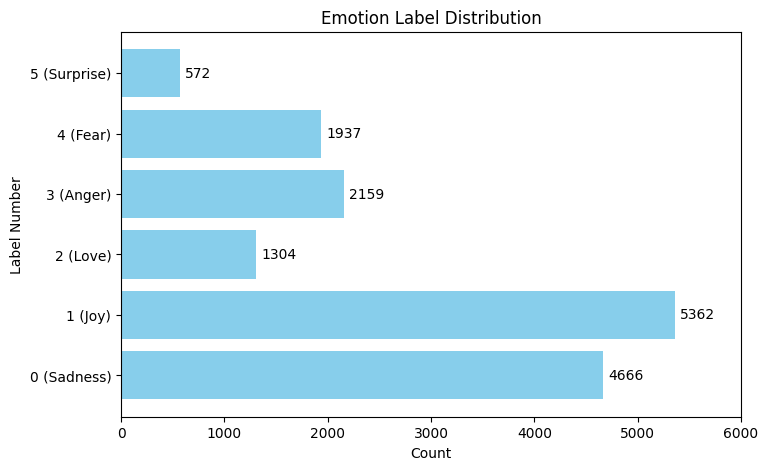

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
train_df = pd.read_csv('training.csv')
label_map = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}
label_counts = train_df['label'].value_counts().sort_index()
emotion_names = [label_map[i] for i in label_counts.index]
plt.figure(figsize=(8,5))
bars = plt.barh(label_counts.index.astype(str), label_counts, color='skyblue')
plt.title("Emotion Label Distribution")
plt.ylabel("Label Number")
plt.xlabel("Count")
plt.xticks(ticks=range(0, max(label_counts)+1000, 1000))
plt.yticks(ticks=label_counts.index.astype(str), labels=[f"{i} ({label_map[i]})" for i in label_counts.index])
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, int(width), va='center')
plt.show()

**Final Conclusion :** The model effectively learns semantic patterns of emotions like sadness, joy, anger, fear, love, and surprise from a labeled dataset. Through training, validation, and testing phases, it achieves strong accuracy and classification metrics, confirming its ability to accurately identify emotions in text inputs.